<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/time_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time HVAE

Hierarchical Variational Autoencoder (VAE) for multivariate time series.

VAE whose decoder output is the mean and log var of the input data and where the sampling process follows a Markov chain of the form zk → zk−1 → ... → z1 → x.

In [1]:
# Install the library

!pip install rapidae

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

notebook_dir = os.path.abspath('') # get the current notebook directory
sys.path.append(os.path.join(notebook_dir, 'rapidae', 'src')) # add src folder to path to import modules
                                                        # '..', 'src' if you are in the 'examples' folder

In [4]:
from rapidae.data import load_dataset
from rapidae.models import TimeHVAE
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_latent_space, plot_reconstructions

### Data

In [5]:
# Load senoid dataset
data = load_dataset("SineWave")

x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

print("Data shape:", x_train.shape)

2024-05-03 14:47:10 [INFO]: Downloading sine_wave.npy...


2024-05-03 14:47:11 [INFO]: Deleting data...


Data shape: (7017, 73, 1)


### Model

In [12]:
timesteps = x_train.shape[1]
num_features = x_train.shape[2]

model = TimeHVAE((timesteps, num_features),
                 nz=2)

2024-05-03 14:53:26 [INFO]: Trying to set encoder and decoder from child class...
2024-05-03 14:53:26 [INFO]: Encoder set from time_hvae
2024-05-03 14:53:26 [INFO]: Decoder set from time_hvae


### Training

In [13]:
epochs = 200
batch_size = 128

pipe = TrainingPipeline(name='TimeHVAE_Senoid', 
                        learning_rate=0.0001,
                        model=model, 
                        num_epochs=epochs, 
                        batch_size=batch_size,
                        run_eagerly=False,)

trained_model = pipe(x=x_train)

2024-05-03 14:53:29 [INFO]: +++ TimeHVAE_Senoid +++
2024-05-03 14:53:29 [INFO]: Creating folder in ./output_dir/TimeHVAE_Senoid_2024-05-03_14-53
2024-05-03 14:53:29 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/200


2024-05-03 14:53:40.311007: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902



Epoch 1: loss improved from inf to 3.22258, saving model to ./output_dir/TimeHVAE_Senoid_2024-05-03_14-53/model.weights.h5
55/55 - 14s - 252ms/step - kl_loss: 0.1563 - loss: 3.2226 - reconstruction_loss: -1.0221e+00
Epoch 2/200

Epoch 2: loss improved from 3.22258 to 1.70756, saving model to ./output_dir/TimeHVAE_Senoid_2024-05-03_14-53/model.weights.h5
55/55 - 3s - 55ms/step - kl_loss: 0.4388 - loss: 1.7076 - reconstruction_loss: -4.2292e-01
Epoch 3/200

Epoch 3: loss improved from 1.70756 to 0.75253, saving model to ./output_dir/TimeHVAE_Senoid_2024-05-03_14-53/model.weights.h5
55/55 - 3s - 52ms/step - kl_loss: 0.4502 - loss: 0.7525 - reconstruction_loss: -1.0079e-01
Epoch 4/200

Epoch 4: loss improved from 0.75253 to 0.29383, saving model to ./output_dir/TimeHVAE_Senoid_2024-05-03_14-53/model.weights.h5
55/55 - 3s - 55ms/step - kl_loss: 0.4034 - loss: 0.2938 - reconstruction_loss: 0.0365
Epoch 5/200

Epoch 5: loss improved from 0.29383 to -0.01748, saving model to ./output_dir/Time

2024-05-03 15:03:45 [INFO]: Restoring best model
2024-05-03 15:03:46 [INFO]: Best model restored


### Evaluation

In [14]:
outputs = trained_model.predict(x_train)

220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


2024-04-23 18:56:46 [INFO]: Latent space > 2. Performing dimensionality reduction using t-SNE...


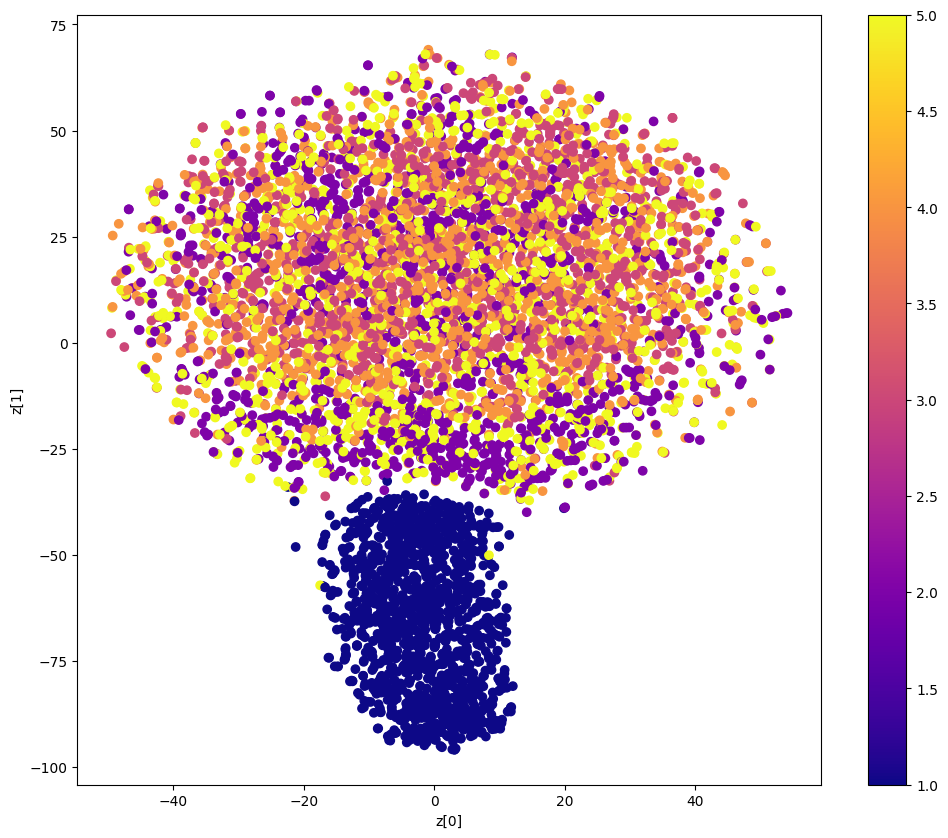

In [9]:
plot_latent_space(outputs['z'], y_train)

In [15]:
reconstructions = model.reconstruct(x_train)

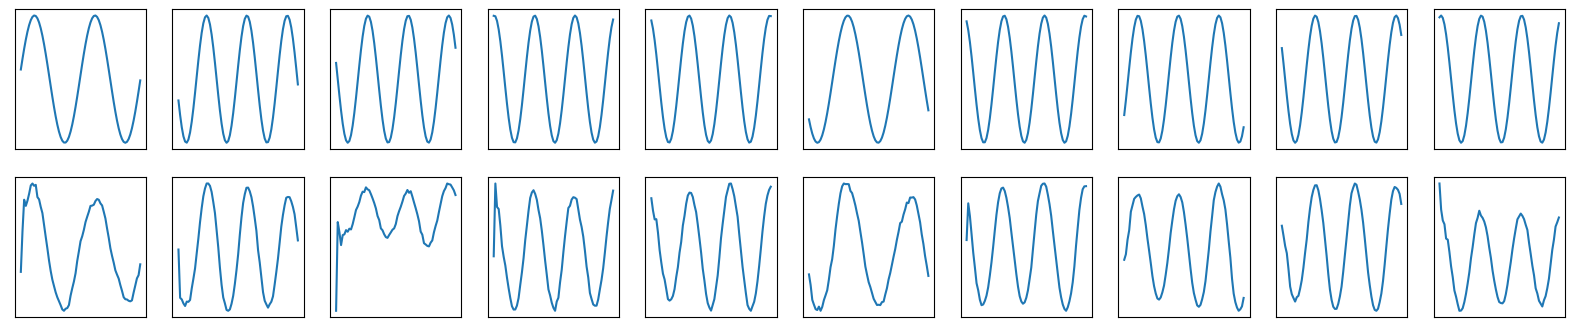

In [17]:
#reconstructions = trained_model.reconstruct(x_train)
plot_reconstructions(x_train, reconstructions.numpy(), type="ts")